## Building a comprehensive set of Technical Indicators in Python for quantitative trading

https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb

In [47]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

#extracting data from Yahoo Finance API
tickers = ['AAPL','NFLX']
all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

for i in tickers:
    try:
        test_data = yf.download('GOOGL', start=dt.datetime(1990,1,1), end=dt.date.today())
        #test_data = pdr.get_data_yahoo(i, start = dt.datetime(1990,1,1), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
    except:
        no_data.append(i)

#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 

[*********************100%***********************]  1 of 1 completed


C:\Users\nikjo\AppData\Local\Temp\ipykernel_23724\2694817189.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(test_data)


[*********************100%***********************]  1 of 1 completed


C:\Users\nikjo\AppData\Local\Temp\ipykernel_23724\2694817189.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(test_data)


In [48]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import bs4 as bs
import requests
from IPython.display import clear_output
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
from sklearn.model_selection import GridSearchCV
sns.set()



#Obtain list of S&100 companies from wikipedia
resp = requests.get("https://en.wikipedia.org/wiki/S%26P_100")
convert_soup = bs.BeautifulSoup(resp.text, 'lxml')
table = convert_soup.find('table',{'class':'wikitable sortable'})

tickers = []

for rows in table.findAll('tr')[1:]:
    ticker = rows.findAll('td')[0].text.strip()
    tickers.append(ticker)

all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

#Extract data from Yahoo Finance
for i in tickers:
    try:
        print(i)
        test_data = yf.download('GOOGL', start=dt.datetime(1990,1,1), end=dt.date.today())
        #test_data = pdr.get_data_yahoo(i, start = dt.datetime(1990,1,1), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
        clear_output(wait = True)
    except:
        no_data.append(i)

    clear_output(wait = True)

XOM
[*********************100%***********************]  1 of 1 completed


C:\Users\nikjo\AppData\Local\Temp\ipykernel_23724\1949367321.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(test_data)


## Simple Moving Average(SMA)
Simple Moving Average is one of the most common technical indicators. SMA calculates the average of prices over a given interval of time and is used to determine the trend of the stock. As defined above, I will create a slow SMA (SMA_15) and a fast SMA (SMA_5). To provide Machine Learning algorithms with already engineered factors, one can also use (SMA_15/SMA_5) or (SMA_15 - SMA_5) as a factor to capture the relationship between these two moving averages.

In [49]:
all_data['SMA_5'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA_15'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_ratio'] = all_data['SMA_15'] / all_data['SMA_5']

C:\Users\nikjo\AppData\Local\Temp\ipykernel_23724\584607601.py:8: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax0.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['Close','SMA_5','SMA_15']])
C:\Users\nikjo\AppData\Local\Temp\ipykernel_23724\584607601.py:14: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax1.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['SMA_ratio']], color = 'blue')


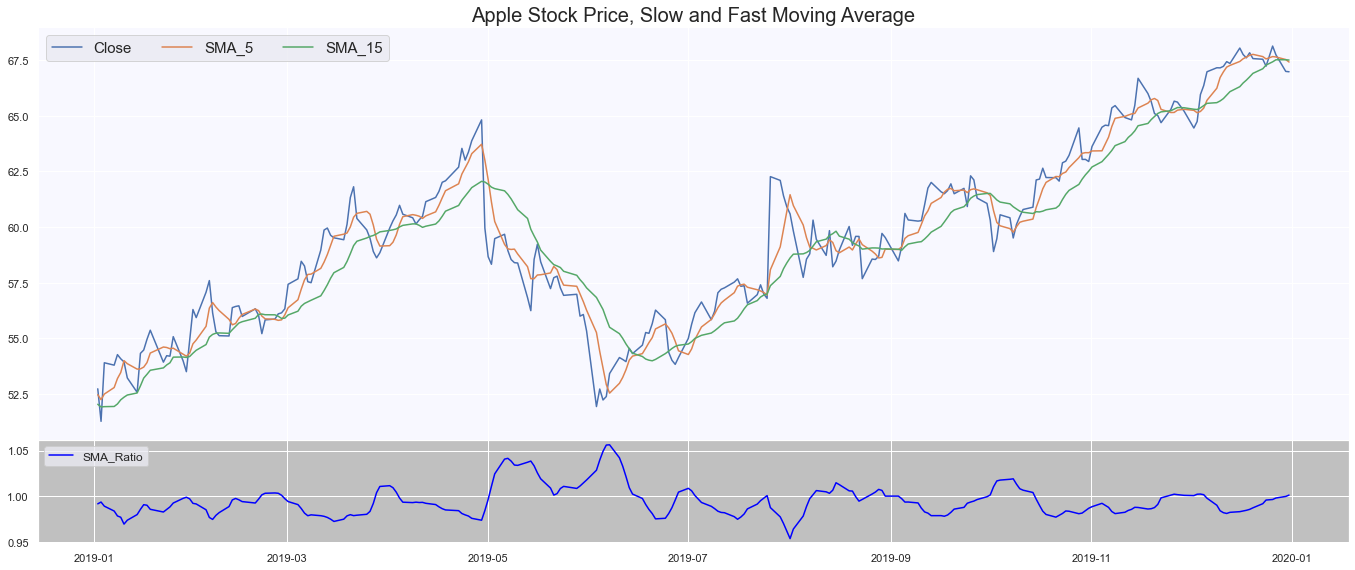

In [50]:
start = dt.datetime.strptime('2019-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2019-12-31', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['Close','SMA_5','SMA_15']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Apple Stock Price, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['SMA_ratio']], color = 'blue')
ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

## Simple Moving Average Volume
Similar to Simple Moving Average of price, a simple moving average of volume provides insights into the strength of signal that the stock displays.

In [51]:
all_data['SMA5_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA15_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_Volume_Ratio'] = all_data['SMA5_Volume']/all_data['SMA15_Volume']

## Wilder's Smoothing
 Although SMA is quite common, it contains a bias of giving equal weight to each value in the past. To solve this, Wells Wilder introduced a new version of smoothening that places more weight on the recent events. We will use Wilder’s Smoothing for most of our following indicators, and below is the function that can be generally used to obtain this Smoothing.

In [52]:
def Wilder(data, periods):
    start = np.where(~np.isnan(data))[0][0] #Check if nans present in beginning
    Wilder = np.array([np.nan]*len(data))
    Wilder[start+periods-1] = data[start:(start+periods)].mean() #Simple Moving Average
    for i in range(start+periods,len(data)):
        Wilder[i] = (Wilder[i-1]*(periods-1) + data[i])/periods #Wilder Smoothing
    return(Wilder)

## Average True Range
Average True Range is a common technical indicator used to measure volatility in the market, measured as a moving average of True Ranges. A higher ATR of a company implied higher volatility of the stock. ATR however is primarily used in identifying when to exit or enter a trade rather than the direction in which to trade the stock.

In [53]:
all_data['prev_close'] = all_data.groupby('symbol')['Close'].shift(1)
all_data['TR'] = np.maximum((all_data['High'] - all_data['Low']), 
                     np.maximum(abs(all_data['High'] - all_data['prev_close']), 
                     abs(all_data['prev_close'] - all_data['Low'])))
for i in all_data['symbol'].unique():
    TR_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ATR_5'] = Wilder(TR_data['TR'], 5)
    all_data.loc[all_data.symbol==i,'ATR_15'] = Wilder(TR_data['TR'], 15)

all_data['ATR_Ratio'] = all_data['ATR_5'] / all_data['ATR_15']

## Average Directional Index
Its main components, +DI and -DI helps in identifying the direction of the trend. In general, an ADX of 25 or above indicates a strong trend and an ADX of less than 20 indicates a weak trend. 

In [54]:
all_data['prev_high'] = all_data.groupby('symbol')['High'].shift(1)
all_data['prev_low'] = all_data.groupby('symbol')['Low'].shift(1)

all_data['+DM'] = np.where(~np.isnan(all_data.prev_high),
                           np.where((all_data['High'] > all_data['prev_high']) & 
         (((all_data['High'] - all_data['prev_high']) > (all_data['prev_low'] - all_data['Low']))), 
                                                                  all_data['High'] - all_data['prev_high'], 
                                                                  0),np.nan)

all_data['-DM'] = np.where(~np.isnan(all_data.prev_low),
                           np.where((all_data['prev_low'] > all_data['Low']) & 
         (((all_data['prev_low'] - all_data['Low']) > (all_data['High'] - all_data['prev_high']))), 
                                    all_data['prev_low'] - all_data['Low'], 
                                    0),np.nan)

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'+DM_5'] = Wilder(ADX_data['+DM'], 5)
    all_data.loc[all_data.symbol==i,'-DM_5'] = Wilder(ADX_data['-DM'], 5)
    all_data.loc[all_data.symbol==i,'+DM_15'] = Wilder(ADX_data['+DM'], 15)
    all_data.loc[all_data.symbol==i,'-DM_15'] = Wilder(ADX_data['-DM'], 15)

all_data['+DI_5'] = (all_data['+DM_5']/all_data['ATR_5'])*100
all_data['-DI_5'] = (all_data['-DM_5']/all_data['ATR_5'])*100
all_data['+DI_15'] = (all_data['+DM_15']/all_data['ATR_15'])*100
all_data['-DI_15'] = (all_data['-DM_15']/all_data['ATR_15'])*100

all_data['DX_5'] = (np.round(abs(all_data['+DI_5'] - all_data['-DI_5'])/(all_data['+DI_5'] + all_data['-DI_5']) * 100))

all_data['DX_15'] = (np.round(abs(all_data['+DI_15'] - all_data['-DI_15'])/(all_data['+DI_15'] + all_data['-DI_15']) * 100))

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ADX_5'] = Wilder(ADX_data['DX_5'], 5)
    all_data.loc[all_data.symbol==i,'ADX_15'] = Wilder(ADX_data['DX_15'], 15)

## Stochastic Oscillators
Stochastic oscillator is a momentum indicator aiming at identifying overbought and oversold securities and is commonly used in technical analysis.

In [55]:

all_data['Lowest_5D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 5).min())
all_data['High_5D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 5).max())
all_data['Lowest_15D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 15).min())
all_data['High_15D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 15).max())

all_data['Stochastic_5'] = ((all_data['Close'] - all_data['Lowest_5D'])/(all_data['High_5D'] - all_data['Lowest_5D']))*100
all_data['Stochastic_15'] = ((all_data['Close'] - all_data['Lowest_15D'])/(all_data['High_15D'] - all_data['Lowest_15D']))*100

all_data['Stochastic_%D_5'] = all_data['Stochastic_5'].rolling(window = 5).mean()
all_data['Stochastic_%D_15'] = all_data['Stochastic_5'].rolling(window = 15).mean()

all_data['Stochastic_Ratio'] = all_data['Stochastic_%D_5']/all_data['Stochastic_%D_15']

## Relative Strength Index
RSI is one of the most common momentum indicator aimed at quantifies price changes and the speed of such change.

In [56]:
all_data['Diff'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']

## Moving Average Convergence Divergence
MACD uses two exponentially moving averages and creates a trend analysis based on their convergence or divergence. Although most commonly used MACD slow and fast signals are based on 26 days and 12 days respectively, I have used 15 days and 5 days to be consistent with other indicators.

In [57]:
all_data['5Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
all_data['15Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
all_data['MACD'] = all_data['15Ewm'] - all_data['5Ewm']

## Bollinger Bands
Bollinger bands capture the volatility of a stock and are used to identify overbought and oversold stocks. Bollinger bands consists of three main elements: The simple moving average line, an upper bound which is 2 standard deviations above moving average and a lower bound which is 2 standard deviations below moving average.

In [58]:

all_data['15MA'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).mean())
all_data['SD'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).std())
all_data['upperband'] = all_data['15MA'] + 2*all_data['SD']
all_data['lowerband'] = all_data['15MA'] - 2*all_data['SD']

## Rate of Change
Rate of change is a momentum indicator that explains a price momentum relative to a price fixed period before.

In [59]:
all_data['RC'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.pct_change(periods = 15)) 

## Implementation of Technical Indicators into a Machine Learning framework for Quantitative Trading

https://towardsdatascience.com/implementation-of-technical-indicators-into-a-machine-learning-framework-for-quantitative-trading-44a05be8e06

In [60]:
all_data['Close_Shifted'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.shift(-6))
all_data['Target'] = ((all_data['Close_Shifted'] - all_data['Open'])/(all_data['Open']) * 100).shift(-1)
all_data['Target_Direction'] = np.where(all_data['Target']>0,1,0)
all_data = all_data.dropna().copy()

In [61]:
Target_variables = ['SMA_ratio','ATR_5','ATR_15','ATR_Ratio',
                       'ADX_5','ADX_15','SMA_Volume_Ratio','Stochastic_5','Stochastic_15','Stochastic_Ratio',
                      'RSI_5','RSI_15','RSI_ratio','MACD']
for variable in Target_variables:
    all_data.loc[:,variable] = mstats.winsorize(all_data.loc[:,variable], limits = [0.1,0.1])

returns = all_data[['symbol','return']].copy()
on the line below there does not seem to be a column 'return' in the dataframe.


Its part of the previous code. You can create return as the diff() between two consecutive trading days.

c:\Users\nikjo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\nikjo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\nikjo\AppData\Local\Temp\ipykernel_23724\2301927557.py:14: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  sum_of_sq[k-1] = KMeans(n_clusters=k).fit(X).inertia_
c:\Users\nikjo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: [

,Difference in SS
1,NaN
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0


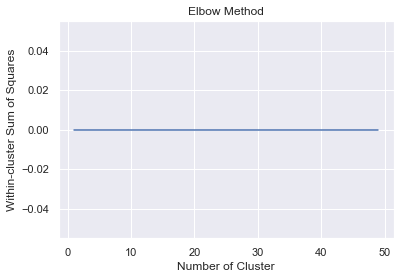

In [46]:
#Extract the returns
returns = all_data[['symbol','return']].copy()
returns['Date'] = returns.index.copy()

#Pivot the returns to create series of returns for each stock 
transposed = returns.pivot(index = 'Date', columns = 'symbol', values = 'return')

#Transpose the data to get companies on the index level and dates on the column level since clusters takes place on index level
X = transposed.dropna().transpose()

#Extract sum of squares for K-means clusters from 1 to 50 clusters
sum_of_sq = np.zeros([50, 1])
for k in range(1, 51):
    sum_of_sq[k-1] = KMeans(n_clusters=k).fit(X).inertia_
    
plt.plot(range(1, 50), sum_of_sq[1:50])
plt.title("Elbow Method") 
plt.xlabel("Number of Cluster") 
plt.ylabel("Within-cluster Sum of Squares")

pd.DataFrame(sum_of_sq, columns = ['Difference in SS'], index = range(1,51)).diff()

In [40]:
gmm = GaussianMixture(n_components = 17)
gmm.fit(transposed.dropna().transpose())

#Predict for each company
clusters = gmm.predict(transposed.dropna().transpose())
clusters_df = pd.DataFrame({'Cluster':clusters,
                           'Companies':transposed.columns})

#Sort by Clusters
clusters_df = clusters_df.sort_values(['Cluster']).reset_index(drop = True)

#Save as csv
clusters_df.to_csv("clusters.csv")
clusters_df = pd.read_csv("clusters.csv", index_col = 0)

NameError: name 'transposed' is not defined

In [41]:
all_data.index = pd.to_datetime(all_data.index)

train_data = all_data.loc[:'2018-12-31',]
test_data = all_data.loc['2019-01-01':]

C:\Users\nikjo\AppData\Local\Temp\ipykernel_23724\994285298.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test_data = all_data.loc['2019-01-01':]


C:\Users\nikjo\AppData\Local\Temp\ipykernel_23724\3947840483.py:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  X = X_train['2010-01-01':], y = Y_train.loc['2010-01-01':,'Target_Direction'],


Text(0.5, 1.0, 'Validation Curve Score for n_estimators')

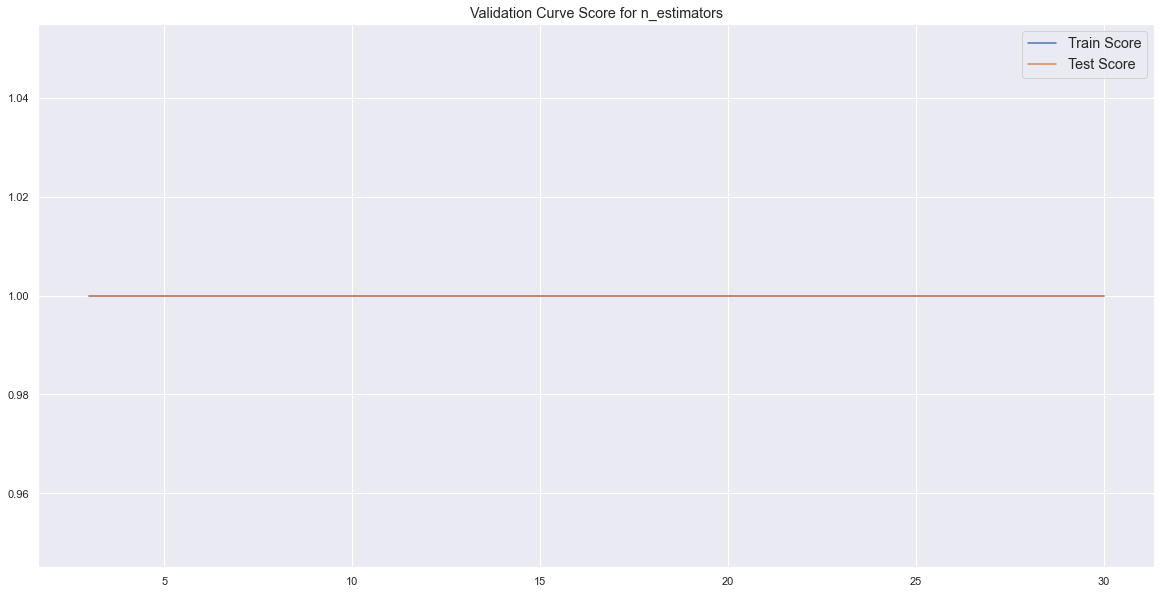

In [42]:
X_train = train_data.loc[:,Target_variables]

Y_train = train_data.loc[:,['Target_Direction']]

#Create validation curve for the Random Forest Classifier
rf = RandomForestClassifier()
train_scoreNum, test_scoreNum = validation_curve(rf,
                                X = X_train['2010-01-01':], y = Y_train.loc['2010-01-01':,'Target_Direction'], 
                                param_name = 'n_estimators', 
                                param_range = [3,4,7,10,12,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)

plt.figure(figsize = (20,10))
plt.plot([3,4,7,10,12,15,20,25,30],train_scores_mean)
plt.plot([3,4,7,10,12,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for n_estimators', fontsize = 'large')

In [43]:
#Run the loop for every unique cluster - 17 loops
for cluster_selected in clusters_df.Cluster.unique():
    
    print(f'The current cluster running is : {cluster_selected}')
    
    #Get data for that cluster
    co_data = all_data[all_data.symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    co_train = co_data[:'2018-12-31']
    co_train = co_train.dropna().copy()
    
    X_train = co_train.loc[:,Target_variables]

    Y_train = co_train.loc[:,['Target_Direction']]

    #Define paramters from Validation Curve
    params = {'max_depth': [5, 7],
          'max_features': ['sqrt'],
          'min_samples_leaf': [10, 15, 20],
          'n_estimators': [5, 7, 9],
         'min_samples_split':[20, 25, 30]} #Using Validation Curves

    rf = RandomForestClassifier()

    #Perform a TimeSeriesSplit on the dataset
    time_series_split = TimeSeriesSplit(n_splits = 3)

    
    rf_cv = GridSearchCV(rf, params, cv = time_series_split, n_jobs = -1, verbose = 20)

    #Fit the random forest with our X_train and Y_train
    rf_cv.fit(X_train, Y_train)
          
    #Save the fited variable into a Pickle file
    file_loc = f'{os.getcwd()}\\Pickle_Files\\Cluster_{cluster_selected}'    
    pickle.dump(rf_cv, open(file_loc,'wb'))

NameError: name 'clusters_df' is not defined

## Trading Back

In [ ]:
#Use 2nd January Data
day_data = test_data.loc['2019-01-02']

pred_for_tomorrow = pd.DataFrame({'Date':[],
                                  'company':[],
                                  'prediction':[]})

#Predict each stock using the 2nd January Data
for cluster_selected in clusters_df.Cluster.unique():
    rf_cv =  pickle.load(open(os.getcwd() + f'\\Pickle_Files\\Cluster_{cluster_selected}', 'rb'))
    best_rf = rf_cv.best_estimator_
    cluster_data = day_data.loc[day_data.symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    cluster_data = cluster_data.dropna()
    if (cluster_data.shape[0]>0):
        X_test = cluster_data.loc[:,Target_variables]

        pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
                                                                   'company':cluster_data['symbol'],
                                                                   'prediction':best_rf.predict_proba(X_test)[:,1]}), ignore_index = True)

In [ ]:
top_10_pred = pred_for_tomorrow.sort_values(by = ['prediction'], ascending = False).head(10)

for selected_company in top_10_pred['company']:
    actual = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target_Direction']
    pct_change = all_data[all_data.symbol == selected_company].loc['2019-01-02','Target']
    top_10_pred.loc[top_10_pred.company == selected_company,'actual'] = actual
    top_10_pred.loc[top_10_pred.company == selected_company,'pct_change'] = pct_change